# Step 1: Set initial gene scores

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
# import the gene_level summary dataset
gene_level_summary_stats = pd.read_csv("/Users/xcai/Desktop/UCSD_Neuroscience_Program/6. 2018 Spring Class/BNFO Network/Final Project/dataset/gene_level_summary_stats_pmid_25056061.txt", sep = '\t')
len(gene_level_summary_stats)

14966

In [3]:
# import snp_level_summary dataset
snp_level_summary_stats = pd.read_csv("/Users/xcai/Desktop/UCSD_Neuroscience_Program/6. 2018 Spring Class/BNFO Network/Final Project/dataset/snp_level_summary_stats_pmid_25056061.txt", sep = '\t')
len(snp_level_summary_stats)

1252901

In [4]:
gene_level_summary_stats.head()

,Unnamed: 0,Gene,Chr,Gene Start,Gene End,nSNPs,TopSNP,TopSNP Pos,TopSNP P-Value,SNP Distance
0,5905,HIST1H4K,6,27906930,27907284,8,rs34706883,27913234.0,5.071180e-10,6304.0
1,5867,HIST1H2AK,6,27913636,27914096,16,rs34706883,27913234.0,5.071180e-10,402.0
2,5883,HIST1H2BN,6,27914418,27914867,17,rs34706883,27913234.0,5.071180e-10,1184.0
3,5868,HIST1H2AL,6,27941085,27941555,10,rs13199772,27942064.0,7.053790e-10,979.0
4,5855,HIST1H1B,6,27942548,27943338,10,rs13199772,27942064.0,7.053790e-10,484.0


In [5]:
# add -log(p) to the dataframe
df_gene=gene_level_summary_stats
df_gene['-logP']=-np.log10(df_gene['TopSNP P-Value'])

In [6]:
df_gene

,Unnamed: 0,Gene,Chr,Gene Start,Gene End,nSNPs,TopSNP,TopSNP Pos,TopSNP P-Value,SNP Distance,-logP
0,5905,HIST1H4K,6,27906930,27907284,8,rs34706883,27913234.0,5.071180e-10,6304.0,9.294891
1,5867,HIST1H2AK,6,27913636,27914096,16,rs34706883,27913234.0,5.071180e-10,402.0,9.294891
2,5883,HIST1H2BN,6,27914418,27914867,17,rs34706883,27913234.0,5.071180e-10,1184.0,9.294891
3,5868,HIST1H2AL,6,27941085,27941555,10,rs13199772,27942064.0,7.053790e-10,979.0,9.151577
4,5855,HIST1H1B,6,27942548,27943338,10,rs13199772,27942064.0,7.053790e-10,484.0,9.151577
5,5893,HIST1H3I,6,27947601,27948078,10,rs13199772,27942064.0,7.053790e-10,5537.0,9.151577
6,5906,HIST1H4L,6,27948904,27949268,10,rs13199772,27942064.0,7.053790e-10,6840.0,9.151577
7,9968,PGBD1,6,28357342,28378305,30,rs6901575,28358963.0,1.236040e-09,1621.0,8.907967
8,5858,HIST1H1E,6,26264537,26265322,11,rs3857546,26265741.0,1.458100e-09,1204.0,8.836213
9,5873,HIST1H2BD,6,26266327,26279555,15,rs3857546,26265741.0,1.458100e-09,586.0,8.836213


In [7]:
# set inital gene scores as the -logP value
heat_list=df_gene.set_index('Gene')['-logP'].to_dict()
heat_list

{'HIST1H4K': 9.2948909740272878,
 'HIST1H2AK': 9.2948909740272878,
 'HIST1H2BN': 9.2948909740272878,
 'HIST1H2AL': 9.1515774739567028,
 'HIST1H1B': 9.1515774739567028,
 'HIST1H3I': 9.1515774739567028,
 'HIST1H4L': 9.1515774739567028,
 'PGBD1': 8.9079674746370205,
 'HIST1H1E': 8.836212690037998,
 'HIST1H2BD': 8.836212690037998,
 'ZKSCAN4': 8.7459500641354833,
 'ZSCAN12': 8.7027561361260002,
 'ZNF165': 8.3841940360302161,
 'NKAPL': 8.2980022502160011,
 'OR2B2': 7.991165712954623,
 'NT5C2': 7.6513641865719553,
 'ZSCAN23': 7.5675101398937725,
 'EI24': 7.5360100144881343,
 'ZNF184': 7.3947650070055708,
 'ZKSCAN3': 7.3231482445507421,
 'MAD1L1': 7.2957610883391393,
 'CNNM2': 7.1942185382694115,
 'AS3MT': 6.8857126890769669,
 'STT3A': 6.8219299775556932,
 'CHEK1': 6.7462356647747752,
 'HIST1H2BL': 6.6171925763399457,
 'HIST1H3H': 6.6171925763399457,
 'HIST1H2AJ': 6.6171925763399457,
 'HIST1H2BM': 6.6171925763399457,
 'PATE1': 6.5828888460949839,
 'SCGN': 6.5200318864309814,
 'SLC17A1': 6.5120

In [11]:
# Here is another way to assign the initial gene scores
# if -logP>3, keep its values, otherwise, set as 0. 
# alternative way is if -logP>3, set its scores to 1, otherwise, set as 0
new_heat_list= {}
for gene in heat_list.keys():
    if heat_list[gene] > 3:
        new_heat_list[gene]=heat_list[gene]
    else:
        new_heat_list[gene]=0

In [14]:
new_heat_list

{'HIST1H4K': 9.2948909740272878,
 'HIST1H2AK': 9.2948909740272878,
 'HIST1H2BN': 9.2948909740272878,
 'HIST1H2AL': 9.1515774739567028,
 'HIST1H1B': 9.1515774739567028,
 'HIST1H3I': 9.1515774739567028,
 'HIST1H4L': 9.1515774739567028,
 'PGBD1': 8.9079674746370205,
 'HIST1H1E': 8.836212690037998,
 'HIST1H2BD': 8.836212690037998,
 'ZKSCAN4': 8.7459500641354833,
 'ZSCAN12': 8.7027561361260002,
 'ZNF165': 8.3841940360302161,
 'NKAPL': 8.2980022502160011,
 'OR2B2': 7.991165712954623,
 'NT5C2': 7.6513641865719553,
 'ZSCAN23': 7.5675101398937725,
 'EI24': 7.5360100144881343,
 'ZNF184': 7.3947650070055708,
 'ZKSCAN3': 7.3231482445507421,
 'MAD1L1': 7.2957610883391393,
 'CNNM2': 7.1942185382694115,
 'AS3MT': 6.8857126890769669,
 'STT3A': 6.8219299775556932,
 'CHEK1': 6.7462356647747752,
 'HIST1H2BL': 6.6171925763399457,
 'HIST1H3H': 6.6171925763399457,
 'HIST1H2AJ': 6.6171925763399457,
 'HIST1H2BM': 6.6171925763399457,
 'PATE1': 6.5828888460949839,
 'SCGN': 6.5200318864309814,
 'SLC17A1': 6.5120

# Step 2: Import the network

In [8]:
import ndex
from ndex.networkn import NdexGraph

In [9]:
#load the PCNet network into python
dG=NdexGraph(server='http://www.ndexbio.org', uuid= 'f93f402c-86d4-11e7-a10d-0ac135e8bacf')

In [10]:
G=nx.Graph (dG)
G=nx.relabel_nodes(G,nx.get_node_attributes(dG,'name'),copy=True)

In [11]:
# get the nodes information, which are gene names
nodes=G.nodes()

# step 3: random walk with restart to reprioritize genes and get the new rank

In [12]:
import networkx as nx
import time
import numpy as np
import scipy
import pandas as pd
import copy

In [13]:
# Normalize network for random walk propagation
def normalize_network(network, symmetric_norm=False):
    adj_mat = nx.adjacency_matrix(network)
    adj_array = np.array(adj_mat.todense())
    if symmetric_norm:
        D = np.diag(1/np.sqrt(sum(adj_array)))
        adj_array_norm = np.dot(np.dot(D, adj_array), D)
    else:
        degree_norm_array = np.diag(1/sum(adj_array).astype(float))
        sparse_degree_norm_array = scipy.sparse.csr_matrix(degree_norm_array)
        adj_array_norm = sparse_degree_norm_array.dot(adj_mat).toarray()
    return adj_array_norm

In [14]:
# Calculate optimal propagation coefficient (based on the linear model from Justin's paper)
def calculate_alpha(network, m=-0.02935302, b=0.74842057):
    log_edge_count = np.log10(len(network.edges()))
    alpha_val = round(m*log_edge_count+b,3)
    if alpha_val <=0:
        raise ValueError('Alpha <= 0 - Network Edge Count is too high')
    else:
        return alpha_val
# the paper using the analytical form as Ft = (1-alpha_val)*Fo * (I-alpha_val*norm_adj_mat)^-1
# however in our case, we use the analytical form as Ft = alpha*Fo * (I-(1-alpha)*norm_adj_mat)^-1
# so actually, alpha = 1-alpha_val

In [15]:
# random walk using analytical solution: Ft = alpha*Fo * (I-(1-alpha)*norm_adj_mat)^-1
# since the analytical solution might take longer to run, we use the iterative methods in the end.
def random_walk( alpha, binary_mat, adj_array_norm):
    term1=alpha*binary_mat
    term2=np.identity(binary_mat.shape[1])-(1-alpha)*adj_array_norm
    term2_inv = np.linalg.inv(term2)
    prop_data = np.dot(term1, term2_inv)
    return prop_data

In [77]:
# random walk with the restart until convergence using iterative methods
def random_walk_iterative (alpha, binary_mat,adj_array_norm):
    t=0
    term0=binary_mat
    term1=term0
    while True:
        term2=np.dot((1-alpha)*term1,adj_array_norm) + alpha*term0
        t +=1
        dist = np.linalg.norm(term2-term1)
        if dist < 0.000001 : # very close to the steady state
            print('iterate times t:',t)
            return term2
            break
        else:
            term1=term2 

In [17]:
# creat heat_mat as a 1*n vector of initial gene scores 
def create_heat_mat(network, heat_list):
    nodes=network.nodes()
    n=len(nodes)
    nodes_idx_map=dict(list(zip(nodes,range(n))))
    heat_mat=np.zeros((1,n))
    for i in heat_list.keys():
         if i in nodes:
                heat_mat[0,nodes_idx_map[i]]=heat_list[i]
    return heat_mat

In [18]:
# normalize the network of G 
G_adj_array_norm= normalize_network(G)

In [65]:
# Calculate optimal propagation alpha
alpha_val= calculate_alpha(G)
alpha=1-alpha_val

In [66]:
print(alpha)

0.44


In [21]:
heat_mat=create_heat_mat(G,heat_list)
# new_heat_mat=create_heat_mat(G,new_heat_list)

In [67]:
prop=random_walk_iterative(alpha, heat_mat, G_adj_array_norm)
# prop=random_walk_iterative(alpha, new_heat_mat, G_adj_array_norm)

iterate times t: 13


In [76]:
# it took longer to run the random_walk function, and has similar result to the iterative function
# prop=random_walk(alpha, heat_mat, G_adj_array_norm)

In [78]:
# get the scores after network propagation
nodes_rwr=dict(list(zip(nodes,prop[0])))
nodes_rwr

{'UBE2Q1': 1.3051549644788527,
 'RNF14': 1.7541044576829878,
 'UBE2Q2': 1.0920748654891346,
 'TMCO1': 1.8058701820996084,
 'UBAC1': 1.2580082965056865,
 'WWP1': 2.0028252442746748,
 'ZNF706': 0.74103790506604572,
 'MIB2': 0.64389592464412293,
 'RNF114': 1.0288605371277846,
 'RNF115': 0.80237832081646443,
 'RNF111': 2.572492800473086,
 'METTL13': 1.049522333006556,
 'DHX8': 1.8225680999288834,
 'CBLB': 1.5469452503550354,
 'UBE4A': 1.807948680812302,
 'DDX41': 2.1703321797565591,
 'ATMIN': 1.1890494717361226,
 'TSG101': 1.8896618702546142,
 'FBXW11': 2.3263114131141607,
 'UBE2D4': 1.4681663714947748,
 'RPS27A': 4.2641797692299503,
 'UBE2D2': 3.8603089271748177,
 'ATP6V1H': 1.2282321737914002,
 'UBE2D1': 2.5460569560061015,
 'MFSD11': 1.2542102574480032,
 'CCT3': 3.9229722917821523,
 'KIAA0368': 0.74720117103329686,
 'MRFAP1L1': 1.4410676848138653,
 'GTF2B': 2.4115096728382408,
 'FBXL13': 0.64116624854376791,
 'FBXL12': 1.5961515714012442,
 'FBXL15': 1.8033964462331171,
 'FBXL14': 0.8502

In [133]:
# sort the scores from highest to lowest
from collections import OrderedDict
sorted_nodes_rwr = OrderedDict(sorted(nodes_rwr.items(), key=lambda x: x[1],reverse=True))
sorted_nodes_rwr

OrderedDict([('UBC', 37.160156054874932),
             ('APP', 14.018629225637246),
             ('PRKACB', 9.5754376034766882),
             ('PRKACA', 9.4857209471373825),
             ('HNF4A', 9.4831923441433794),
             ('GNB1', 9.4079365144409426),
             ('TAF1', 9.3719541055750515),
             ('PRKACG', 9.3696459183813339),
             ('JUN', 8.0200907413688309),
             ('GNGT1', 7.9505676598733928),
             ('ARRB1', 7.9401327154909627),
             ('MYC', 7.688972075992905),
             ('GRK2', 7.6880429876324472),
             ('ELAVL1', 7.6793519734569635),
             ('REEP1', 7.4845848709316574),
             ('GNAL', 7.405096203976596),
             ('ARRB2', 7.3011583313981561),
             ('GNG13', 7.2505487038672829),
             ('ESR1', 7.06994262256881),
             ('RTP2', 6.8167642821143231),
             ('RTP1', 6.806928292728962),
             ('TP53', 6.7769937498231458),
             ('SP1', 6.7629060149767852),
       

In [134]:
# check the new ranking of some genes
list(sorted_nodes_rwr.keys()).index('DRD2')

380

In [81]:
# sort the genes based on scores and get the ranked gene list
a1=nodes_rwr
a1_sorted_keys = sorted(a1, key=a1.get, reverse=True)

In [82]:
# get the top genes (top 100, or top 1000), top 260 genes for evaluation
rwr_genes=a1_sorted_keys[0:260] 
rwr_genes

['UBC',
 'APP',
 'HNF4A',
 'TAF1',
 'PRKACB',
 'PRKACA',
 'GNB1',
 'PRKACG',
 'JUN',
 'MYC',
 'GNGT1',
 'GRK2',
 'ELAVL1',
 'ARRB1',
 'ARRB2',
 'ESR1',
 'REEP1',
 'GNAL',
 'GNG13',
 'TP53',
 'SP1',
 'RTP2',
 'RTP1',
 'GNG7',
 'EGFR',
 'EP300',
 'XPO1',
 'HSPA8',
 'MAPK1',
 'TCF4',
 'HSP90AB1',
 'GRK3',
 'HIST1H2BN',
 'GRB2',
 'SLC17A1',
 'HSP90AA1',
 'UBA52',
 'HSPA5',
 'SRC',
 'CHEK1',
 'HIST1H2BD',
 'NTRK1',
 'NTSR2',
 'INS',
 'TRIM28',
 'HDAC1',
 'LYN',
 'ACTB',
 'PPP1CA',
 'SRPK2',
 'PIK3C2A',
 'GNAO1',
 'FYN',
 'CTNNB1',
 'PIK3CA',
 'HSPD1',
 'SLC17A3',
 'GSK3A',
 'NXF1',
 'HIST1H4C',
 'OR2B2',
 'HRAS',
 'HIST1H4K',
 'HIST1H2BC',
 'SUMO1',
 'AKT1',
 'HIST1H4L',
 'ZNF184',
 'MAPK3',
 'CAD',
 'HIST1H1B',
 'HIST1H1E',
 'ALB',
 'CDC5L',
 'SMARCA5',
 'CREBBP',
 'COPS5',
 'PGBD1',
 'HSPA4',
 'PLCB2',
 'CUL3',
 'HIST1H3I',
 'SLC6A7',
 'HIST1H2AK',
 'PCNA',
 'YWHAZ',
 'HDAC2',
 'EGF',
 'GAPDH',
 'HIST1H2BL',
 'YWHAE',
 'HIST1H2AL',
 'UBB',
 'HIST1H2AC',
 'RET',
 'RB1',
 'CALM1',
 'NT5C2',

# Step 4: Evaluation methods 

In [28]:
# load the CTD schizophrenia associated genes as our validation set
scz_gene_set= [{"gene":{"symbol":"TAGLN","href":"/api/1.0/gene/TAGLN"},"thresholdValue":1.0,"standardizedValue":1.35647},{"gene":{"symbol":"SREBF2","href":"/api/1.0/gene/SREBF2"},"thresholdValue":1.0,"standardizedValue":1.11775},{"gene":{"symbol":"CCDC137","href":"/api/1.0/gene/CCDC137"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAPK3","href":"/api/1.0/gene/MAPK3"},"thresholdValue":1.0,"standardizedValue":1.23584},{"gene":{"symbol":"HCAR2","href":"/api/1.0/gene/HCAR2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TH","href":"/api/1.0/gene/TH"},"thresholdValue":1.0,"standardizedValue":1.46304},{"gene":{"symbol":"HOMER1","href":"/api/1.0/gene/HOMER1"},"thresholdValue":1.0,"standardizedValue":1.12737},{"gene":{"symbol":"EDEM2","href":"/api/1.0/gene/EDEM2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR7","href":"/api/1.0/gene/HTR7"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIK5","href":"/api/1.0/gene/GRIK5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NR0B2","href":"/api/1.0/gene/NR0B2"},"thresholdValue":1.0,"standardizedValue":1.23584},{"gene":{"symbol":"SLC26A8","href":"/api/1.0/gene/SLC26A8"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD6","href":"/api/1.0/gene/SCZD6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAOB","href":"/api/1.0/gene/MAOB"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"EFNA1","href":"/api/1.0/gene/EFNA1"},"thresholdValue":1.0,"standardizedValue":1.28765},{"gene":{"symbol":"CCL2","href":"/api/1.0/gene/CCL2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SLC22A2","href":"/api/1.0/gene/SLC22A2"},"thresholdValue":1.0,"standardizedValue":1.56312},{"gene":{"symbol":"PLXNA2","href":"/api/1.0/gene/PLXNA2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR1A","href":"/api/1.0/gene/HTR1A"},"thresholdValue":1.0,"standardizedValue":1.71606},{"gene":{"symbol":"FOSB","href":"/api/1.0/gene/FOSB"},"thresholdValue":1.0,"standardizedValue":1.35328},{"gene":{"symbol":"GRM3","href":"/api/1.0/gene/GRM3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD8","href":"/api/1.0/gene/SCZD8"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD1","href":"/api/1.0/gene/SCZD1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DAO","href":"/api/1.0/gene/DAO"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LGR4","href":"/api/1.0/gene/LGR4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR6","href":"/api/1.0/gene/HTR6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD7","href":"/api/1.0/gene/SCZD7"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SLC6A1","href":"/api/1.0/gene/SLC6A1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DUSP1","href":"/api/1.0/gene/DUSP1"},"thresholdValue":1.0,"standardizedValue":1.31837},{"gene":{"symbol":"BCL2","href":"/api/1.0/gene/BCL2"},"thresholdValue":1.0,"standardizedValue":1.20687},{"gene":{"symbol":"CELF2","href":"/api/1.0/gene/CELF2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CASP3","href":"/api/1.0/gene/CASP3"},"thresholdValue":1.0,"standardizedValue":1.20719},{"gene":{"symbol":"CHI3L1","href":"/api/1.0/gene/CHI3L1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TAC1","href":"/api/1.0/gene/TAC1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"VIPR2","href":"/api/1.0/gene/VIPR2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR2C","href":"/api/1.0/gene/HTR2C"},"thresholdValue":1.0,"standardizedValue":2.0356},{"gene":{"symbol":"HINT1","href":"/api/1.0/gene/HINT1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TRAK1","href":"/api/1.0/gene/TRAK1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ZNF565","href":"/api/1.0/gene/ZNF565"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FASTKD5","href":"/api/1.0/gene/FASTKD5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NKAPL","href":"/api/1.0/gene/NKAPL"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GSK3A","href":"/api/1.0/gene/GSK3A"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"THBS1","href":"/api/1.0/gene/THBS1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HNRNPA3","href":"/api/1.0/gene/HNRNPA3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"INS","href":"/api/1.0/gene/INS"},"thresholdValue":1.0,"standardizedValue":1.21695},{"gene":{"symbol":"HMGCS1","href":"/api/1.0/gene/HMGCS1"},"thresholdValue":1.0,"standardizedValue":1.39422},{"gene":{"symbol":"SLC6A3","href":"/api/1.0/gene/SLC6A3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TAAR6","href":"/api/1.0/gene/TAAR6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP2C9","href":"/api/1.0/gene/CYP2C9"},"thresholdValue":1.0,"standardizedValue":1.22048},{"gene":{"symbol":"NRG3","href":"/api/1.0/gene/NRG3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NDUFV2","href":"/api/1.0/gene/NDUFV2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SOD1","href":"/api/1.0/gene/SOD1"},"thresholdValue":1.0,"standardizedValue":1.60547},{"gene":{"symbol":"CPLX1","href":"/api/1.0/gene/CPLX1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRA1","href":"/api/1.0/gene/GABRA1"},"thresholdValue":1.0,"standardizedValue":1.48761},{"gene":{"symbol":"CNTNAP2","href":"/api/1.0/gene/CNTNAP2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ADAMTS3","href":"/api/1.0/gene/ADAMTS3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAGEC1","href":"/api/1.0/gene/MAGEC1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"KDM2B","href":"/api/1.0/gene/KDM2B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SERPINI1","href":"/api/1.0/gene/SERPINI1"},"thresholdValue":1.0,"standardizedValue":1.50146},{"gene":{"symbol":"NGFR","href":"/api/1.0/gene/NGFR"},"thresholdValue":1.0,"standardizedValue":1.04868},{"gene":{"symbol":"CCDC108","href":"/api/1.0/gene/CCDC108"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAPK8","href":"/api/1.0/gene/MAPK8"},"thresholdValue":1.0,"standardizedValue":1.12906},{"gene":{"symbol":"AKT1","href":"/api/1.0/gene/AKT1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DLG1","href":"/api/1.0/gene/DLG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD13","href":"/api/1.0/gene/SCZD13"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PRL","href":"/api/1.0/gene/PRL"},"thresholdValue":1.0,"standardizedValue":2.21213},{"gene":{"symbol":"SPATA5","href":"/api/1.0/gene/SPATA5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP3A4","href":"/api/1.0/gene/CYP3A4"},"thresholdValue":1.0,"standardizedValue":1.71441},{"gene":{"symbol":"OXTR","href":"/api/1.0/gene/OXTR"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FGFR1","href":"/api/1.0/gene/FGFR1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GAD1","href":"/api/1.0/gene/GAD1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NTRK1","href":"/api/1.0/gene/NTRK1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MIR137","href":"/api/1.0/gene/MIR137"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DRD3","href":"/api/1.0/gene/DRD3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HRH1","href":"/api/1.0/gene/HRH1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FAS","href":"/api/1.0/gene/FAS"},"thresholdValue":1.0,"standardizedValue":1.07057},{"gene":{"symbol":"TRRAP","href":"/api/1.0/gene/TRRAP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SP4","href":"/api/1.0/gene/SP4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP2D6","href":"/api/1.0/gene/CYP2D6"},"thresholdValue":1.0,"standardizedValue":1.96935},{"gene":{"symbol":"CCND1","href":"/api/1.0/gene/CCND1"},"thresholdValue":1.0,"standardizedValue":1.18159},{"gene":{"symbol":"COMT","href":"/api/1.0/gene/COMT"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NRXN1","href":"/api/1.0/gene/NRXN1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD3","href":"/api/1.0/gene/SCZD3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NFKB1","href":"/api/1.0/gene/NFKB1"},"thresholdValue":1.0,"standardizedValue":1.02077},{"gene":{"symbol":"RELN","href":"/api/1.0/gene/RELN"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ASNS","href":"/api/1.0/gene/ASNS"},"thresholdValue":1.0,"standardizedValue":1.27132},{"gene":{"symbol":"NPRL2","href":"/api/1.0/gene/NPRL2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"JUND","href":"/api/1.0/gene/JUND"},"thresholdValue":1.0,"standardizedValue":1.01549},{"gene":{"symbol":"FAM3D","href":"/api/1.0/gene/FAM3D"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PLCB1","href":"/api/1.0/gene/PLCB1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"AVP","href":"/api/1.0/gene/AVP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DISC2","href":"/api/1.0/gene/DISC2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP2E1","href":"/api/1.0/gene/CYP2E1"},"thresholdValue":1.0,"standardizedValue":1.10353},{"gene":{"symbol":"GNAI2","href":"/api/1.0/gene/GNAI2"},"thresholdValue":1.0,"standardizedValue":1.26483},{"gene":{"symbol":"KDR","href":"/api/1.0/gene/KDR"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ZKSCAN4","href":"/api/1.0/gene/ZKSCAN4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SELENBP1","href":"/api/1.0/gene/SELENBP1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"APOL2","href":"/api/1.0/gene/APOL2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PDE4B","href":"/api/1.0/gene/PDE4B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ATP6V1B2","href":"/api/1.0/gene/ATP6V1B2"},"thresholdValue":1.0,"standardizedValue":1.0241},{"gene":{"symbol":"NTNG1","href":"/api/1.0/gene/NTNG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ZNF804A","href":"/api/1.0/gene/ZNF804A"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"BTG1","href":"/api/1.0/gene/BTG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MBP","href":"/api/1.0/gene/MBP"},"thresholdValue":1.0,"standardizedValue":1.16137},{"gene":{"symbol":"DRD1","href":"/api/1.0/gene/DRD1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TP53","href":"/api/1.0/gene/TP53"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"UGT1A3","href":"/api/1.0/gene/UGT1A3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SBNO1","href":"/api/1.0/gene/SBNO1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CRH","href":"/api/1.0/gene/CRH"},"thresholdValue":1.0,"standardizedValue":1.53382},{"gene":{"symbol":"DRD2","href":"/api/1.0/gene/DRD2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MET","href":"/api/1.0/gene/MET"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PCM1","href":"/api/1.0/gene/PCM1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LDLR","href":"/api/1.0/gene/LDLR"},"thresholdValue":1.0,"standardizedValue":1.13484},{"gene":{"symbol":"PVALB","href":"/api/1.0/gene/PVALB"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PLCL2","href":"/api/1.0/gene/PLCL2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MTOR","href":"/api/1.0/gene/MTOR"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MTHFR","href":"/api/1.0/gene/MTHFR"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CHD4","href":"/api/1.0/gene/CHD4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LAMA1","href":"/api/1.0/gene/LAMA1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"EFNA2","href":"/api/1.0/gene/EFNA2"},"thresholdValue":1.0,"standardizedValue":1.23584},{"gene":{"symbol":"ALS2CL","href":"/api/1.0/gene/ALS2CL"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAPK1","href":"/api/1.0/gene/MAPK1"},"thresholdValue":1.0,"standardizedValue":1.27286},{"gene":{"symbol":"CASP7","href":"/api/1.0/gene/CASP7"},"thresholdValue":1.0,"standardizedValue":1.08055},{"gene":{"symbol":"SCZD11","href":"/api/1.0/gene/SCZD11"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD2","href":"/api/1.0/gene/SCZD2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRA6","href":"/api/1.0/gene/GABRA6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PIK3CB","href":"/api/1.0/gene/PIK3CB"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GSK3B","href":"/api/1.0/gene/GSK3B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"APOL4","href":"/api/1.0/gene/APOL4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LEP","href":"/api/1.0/gene/LEP"},"thresholdValue":1.0,"standardizedValue":1.01212},{"gene":{"symbol":"IL2RA","href":"/api/1.0/gene/IL2RA"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LRRN1","href":"/api/1.0/gene/LRRN1"},"thresholdValue":1.0,"standardizedValue":1.0561},{"gene":{"symbol":"GAD2","href":"/api/1.0/gene/GAD2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PLP1","href":"/api/1.0/gene/PLP1"},"thresholdValue":1.0,"standardizedValue":1.16866},{"gene":{"symbol":"SCZD14","href":"/api/1.0/gene/SCZD14"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NR3C1","href":"/api/1.0/gene/NR3C1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRB2","href":"/api/1.0/gene/GABRB2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RGS4","href":"/api/1.0/gene/RGS4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DTNBP1","href":"/api/1.0/gene/DTNBP1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FOS","href":"/api/1.0/gene/FOS"},"thresholdValue":1.0,"standardizedValue":1.80567},{"gene":{"symbol":"KCNH2","href":"/api/1.0/gene/KCNH2"},"thresholdValue":1.0,"standardizedValue":1.87742},{"gene":{"symbol":"CTSK","href":"/api/1.0/gene/CTSK"},"thresholdValue":1.0,"standardizedValue":1.0734},{"gene":{"symbol":"SAP30BP","href":"/api/1.0/gene/SAP30BP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TSPAN18","href":"/api/1.0/gene/TSPAN18"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PAK2","href":"/api/1.0/gene/PAK2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ACOT6","href":"/api/1.0/gene/ACOT6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CP","href":"/api/1.0/gene/CP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MT-ND4","href":"/api/1.0/gene/MT-ND4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NUPR1","href":"/api/1.0/gene/NUPR1"},"thresholdValue":1.0,"standardizedValue":1.57641},{"gene":{"symbol":"SLC18A2","href":"/api/1.0/gene/SLC18A2"},"thresholdValue":1.0,"standardizedValue":1.1529},{"gene":{"symbol":"CPLX2","href":"/api/1.0/gene/CPLX2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"VPS35","href":"/api/1.0/gene/VPS35"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP2C19","href":"/api/1.0/gene/CYP2C19"},"thresholdValue":1.0,"standardizedValue":1.43755},{"gene":{"symbol":"INHBE","href":"/api/1.0/gene/INHBE"},"thresholdValue":1.0,"standardizedValue":1.13724},{"gene":{"symbol":"ESAM","href":"/api/1.0/gene/ESAM"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"WIPI1","href":"/api/1.0/gene/WIPI1"},"thresholdValue":1.0,"standardizedValue":1.49148},{"gene":{"symbol":"CASP4","href":"/api/1.0/gene/CASP4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ADCY7","href":"/api/1.0/gene/ADCY7"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIN2D","href":"/api/1.0/gene/GRIN2D"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"IL6","href":"/api/1.0/gene/IL6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CLTB","href":"/api/1.0/gene/CLTB"},"thresholdValue":1.0,"standardizedValue":1.03084},{"gene":{"symbol":"NTSR1","href":"/api/1.0/gene/NTSR1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DPYD","href":"/api/1.0/gene/DPYD"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIN2A","href":"/api/1.0/gene/GRIN2A"},"thresholdValue":1.0,"standardizedValue":1.17134},{"gene":{"symbol":"SRSF1","href":"/api/1.0/gene/SRSF1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD10","href":"/api/1.0/gene/SCZD10"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"KPNA1","href":"/api/1.0/gene/KPNA1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ATF3","href":"/api/1.0/gene/ATF3"},"thresholdValue":1.0,"standardizedValue":1.1607},{"gene":{"symbol":"RTN4","href":"/api/1.0/gene/RTN4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DGCR2","href":"/api/1.0/gene/DGCR2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SLC6A4","href":"/api/1.0/gene/SLC6A4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HLA-DRB1","href":"/api/1.0/gene/HLA-DRB1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIN2B","href":"/api/1.0/gene/GRIN2B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR2A","href":"/api/1.0/gene/HTR2A"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"WDR11","href":"/api/1.0/gene/WDR11"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CAT","href":"/api/1.0/gene/CAT"},"thresholdValue":1.0,"standardizedValue":1.59125},{"gene":{"symbol":"PITPNM1","href":"/api/1.0/gene/PITPNM1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PML","href":"/api/1.0/gene/PML"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NRGN","href":"/api/1.0/gene/NRGN"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"IL1B","href":"/api/1.0/gene/IL1B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"C10ORF10","href":"/api/1.0/gene/C10ORF10"},"thresholdValue":1.0,"standardizedValue":1.16236},{"gene":{"symbol":"GRIA2","href":"/api/1.0/gene/GRIA2"},"thresholdValue":1.0,"standardizedValue":1.27533},{"gene":{"symbol":"APOL1","href":"/api/1.0/gene/APOL1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"COL3A1","href":"/api/1.0/gene/COL3A1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRB3","href":"/api/1.0/gene/GABRB3"},"thresholdValue":1.0,"standardizedValue":1.35155},{"gene":{"symbol":"OR4C46","href":"/api/1.0/gene/OR4C46"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RGS9","href":"/api/1.0/gene/RGS9"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NTF3","href":"/api/1.0/gene/NTF3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RELA","href":"/api/1.0/gene/RELA"},"thresholdValue":1.0,"standardizedValue":1.09083},{"gene":{"symbol":"CHL1","href":"/api/1.0/gene/CHL1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"OPRM1","href":"/api/1.0/gene/OPRM1"},"thresholdValue":1.0,"standardizedValue":1.04757},{"gene":{"symbol":"MAOA","href":"/api/1.0/gene/MAOA"},"thresholdValue":1.0,"standardizedValue":1.33464},{"gene":{"symbol":"AHI1","href":"/api/1.0/gene/AHI1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GPR153","href":"/api/1.0/gene/GPR153"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PGBD1","href":"/api/1.0/gene/PGBD1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NPY","href":"/api/1.0/gene/NPY"},"thresholdValue":1.0,"standardizedValue":1.59451},{"gene":{"symbol":"ABCG2","href":"/api/1.0/gene/ABCG2"},"thresholdValue":1.0,"standardizedValue":1.13758},{"gene":{"symbol":"ZNF480","href":"/api/1.0/gene/ZNF480"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DRD4","href":"/api/1.0/gene/DRD4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SERPINA3","href":"/api/1.0/gene/SERPINA3"},"thresholdValue":1.0,"standardizedValue":1.03641},{"gene":{"symbol":"PRODH","href":"/api/1.0/gene/PRODH"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DISC1","href":"/api/1.0/gene/DISC1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIK2","href":"/api/1.0/gene/GRIK2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TNF","href":"/api/1.0/gene/TNF"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SDF4","href":"/api/1.0/gene/SDF4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RB1CC1","href":"/api/1.0/gene/RB1CC1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DAOA","href":"/api/1.0/gene/DAOA"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ABCB1","href":"/api/1.0/gene/ABCB1"},"thresholdValue":1.0,"standardizedValue":1.45247},{"gene":{"symbol":"CNR1","href":"/api/1.0/gene/CNR1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CAMK2B","href":"/api/1.0/gene/CAMK2B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"BDNF","href":"/api/1.0/gene/BDNF"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CLINT1","href":"/api/1.0/gene/CLINT1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HP","href":"/api/1.0/gene/HP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NOS1","href":"/api/1.0/gene/NOS1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ARC","href":"/api/1.0/gene/ARC"},"thresholdValue":1.0,"standardizedValue":1.3793},{"gene":{"symbol":"CTNNB1","href":"/api/1.0/gene/CTNNB1"},"thresholdValue":1.0,"standardizedValue":1.34606},{"gene":{"symbol":"PHB","href":"/api/1.0/gene/PHB"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"BAX","href":"/api/1.0/gene/BAX"},"thresholdValue":1.0,"standardizedValue":1.36047},{"gene":{"symbol":"TEKT5","href":"/api/1.0/gene/TEKT5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CREB1","href":"/api/1.0/gene/CREB1"},"thresholdValue":1.0,"standardizedValue":1.37619},{"gene":{"symbol":"KLF12","href":"/api/1.0/gene/KLF12"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP3A5","href":"/api/1.0/gene/CYP3A5"},"thresholdValue":1.0,"standardizedValue":1.17101},{"gene":{"symbol":"ALDH1A1","href":"/api/1.0/gene/ALDH1A1"},"thresholdValue":1.0,"standardizedValue":1.05793},{"gene":{"symbol":"GRIN1","href":"/api/1.0/gene/GRIN1"},"thresholdValue":1.0,"standardizedValue":1.20848},{"gene":{"symbol":"FNDC4","href":"/api/1.0/gene/FNDC4"},"thresholdValue":1.0,"standardizedValue":1.09226},{"gene":{"symbol":"GABRD","href":"/api/1.0/gene/GABRD"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ZNF530","href":"/api/1.0/gene/ZNF530"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GFAP","href":"/api/1.0/gene/GFAP"},"thresholdValue":1.0,"standardizedValue":1.34782},{"gene":{"symbol":"LRP1","href":"/api/1.0/gene/LRP1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LAMA2","href":"/api/1.0/gene/LAMA2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SYN2","href":"/api/1.0/gene/SYN2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"INPP5A","href":"/api/1.0/gene/INPP5A"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GDPD3","href":"/api/1.0/gene/GDPD3"},"thresholdValue":1.0,"standardizedValue":1.54523},{"gene":{"symbol":"NRG1","href":"/api/1.0/gene/NRG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"APOE","href":"/api/1.0/gene/APOE"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RGS2","href":"/api/1.0/gene/RGS2"},"thresholdValue":1.0,"standardizedValue":1.39952},{"gene":{"symbol":"IL6R","href":"/api/1.0/gene/IL6R"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GIF","href":"/api/1.0/gene/GIF"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP1A2","href":"/api/1.0/gene/CYP1A2"},"thresholdValue":1.0,"standardizedValue":1.09857},{"gene":{"symbol":"VPS39","href":"/api/1.0/gene/VPS39"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRM2","href":"/api/1.0/gene/GRM2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RTN4R","href":"/api/1.0/gene/RTN4R"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SLC26A7","href":"/api/1.0/gene/SLC26A7"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAP2","href":"/api/1.0/gene/MAP2"},"thresholdValue":1.0,"standardizedValue":1.169},{"gene":{"symbol":"CDK5","href":"/api/1.0/gene/CDK5"},"thresholdValue":1.0,"standardizedValue":1.09119},{"gene":{"symbol":"PENK","href":"/api/1.0/gene/PENK"},"thresholdValue":1.0,"standardizedValue":1.09998},{"gene":{"symbol":"SYP","href":"/api/1.0/gene/SYP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"JUN","href":"/api/1.0/gene/JUN"},"thresholdValue":1.0,"standardizedValue":1.32162},{"gene":{"symbol":"RGS12","href":"/api/1.0/gene/RGS12"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"EIF5","href":"/api/1.0/gene/EIF5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PAG1","href":"/api/1.0/gene/PAG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD12","href":"/api/1.0/gene/SCZD12"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FABP1","href":"/api/1.0/gene/FABP1"},"thresholdValue":1.0,"standardizedValue":1.07732},{"gene":{"symbol":"TPH1","href":"/api/1.0/gene/TPH1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NTNG2","href":"/api/1.0/gene/NTNG2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"VEGFA","href":"/api/1.0/gene/VEGFA"},"thresholdValue":1.0,"standardizedValue":1.12323},{"gene":{"symbol":"MAL","href":"/api/1.0/gene/MAL"},"thresholdValue":1.0,"standardizedValue":1.02634},{"gene":{"symbol":"NRIP1","href":"/api/1.0/gene/NRIP1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"EGR1","href":"/api/1.0/gene/EGR1"},"thresholdValue":1.0,"standardizedValue":1.3793},{"gene":{"symbol":"GNAS","href":"/api/1.0/gene/GNAS"},"thresholdValue":1.0,"standardizedValue":1.04314}]

In [29]:
len(scz_gene_set)

260

In [31]:
# generate the dictionary of the validation set
d={}
for i in range(len(scz_gene_set)):
    d[scz_gene_set[i]['gene']['symbol']]= scz_gene_set[i]['standardizedValue']

In [32]:
# check the validation set
from operator import itemgetter
d2=sorted(d.items(), key=itemgetter(1),reverse=True)
d2

[('CCDC137', 2.88009),
 ('HCAR2', 2.88009),
 ('EDEM2', 2.88009),
 ('HTR7', 2.88009),
 ('GRIK5', 2.88009),
 ('SLC26A8', 2.88009),
 ('SCZD6', 2.88009),
 ('MAOB', 2.88009),
 ('CCL2', 2.88009),
 ('PLXNA2', 2.88009),
 ('GRM3', 2.88009),
 ('SCZD8', 2.88009),
 ('SCZD1', 2.88009),
 ('DAO', 2.88009),
 ('LGR4', 2.88009),
 ('HTR6', 2.88009),
 ('SCZD7', 2.88009),
 ('SLC6A1', 2.88009),
 ('CELF2', 2.88009),
 ('CHI3L1', 2.88009),
 ('TAC1', 2.88009),
 ('VIPR2', 2.88009),
 ('HINT1', 2.88009),
 ('TRAK1', 2.88009),
 ('ZNF565', 2.88009),
 ('FASTKD5', 2.88009),
 ('NKAPL', 2.88009),
 ('GSK3A', 2.88009),
 ('THBS1', 2.88009),
 ('HNRNPA3', 2.88009),
 ('SLC6A3', 2.88009),
 ('TAAR6', 2.88009),
 ('NRG3', 2.88009),
 ('NDUFV2', 2.88009),
 ('CPLX1', 2.88009),
 ('CNTNAP2', 2.88009),
 ('ADAMTS3', 2.88009),
 ('MAGEC1', 2.88009),
 ('KDM2B', 2.88009),
 ('CCDC108', 2.88009),
 ('AKT1', 2.88009),
 ('DLG1', 2.88009),
 ('SCZD13', 2.88009),
 ('SPATA5', 2.88009),
 ('OXTR', 2.88009),
 ('FGFR1', 2.88009),
 ('GAD1', 2.88009),
 ('N

In [34]:
scz_genes=[*d] # get the dict keys as validation gene set.

In [35]:
# define a intersection function
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [83]:
# Or just keep all the genes
gene_list=rwr_genes

In [84]:
# here is top 260 genes
overlap_genes=intersection(gene_list,scz_genes) 
overlap_genes

['JUN',
 'TP53',
 'MAPK1',
 'NTRK1',
 'INS',
 'CTNNB1',
 'GSK3A',
 'AKT1',
 'MAPK3',
 'PGBD1',
 'ZKSCAN4',
 'CYP2C9',
 'NFKB1',
 'CAMK2B',
 'IL6',
 'DPYD',
 'FGFR1',
 'CREB1',
 'NKAPL',
 'TNF',
 'GSK3B',
 'GRM3',
 'NR3C1']

In [85]:
overlap_ratio=len(intersection(gene_list,scz_genes))/260
overlap_ratio

0.08846153846153847

## parameter optimization

In [125]:
# use top260 genes to evaluate
a1=[]
a2=[]
a3=[]
for a in np.arange((alpha-0.2),(alpha+0.2),0.01):
    a1.append(a)
    prop=random_walk_iterative(a, heat_mat, G_adj_array_norm)
    nodes_rwr=dict(list(zip(nodes,prop[0])))
    sorted_keys = sorted(nodes_rwr, key=nodes_rwr.get, reverse=True)
    rwr_genes=sorted_keys[0:260]
    overlap_genes=intersection(rwr_genes,scz_genes)
    a2.append(overlap_genes)
    overlap_ratio=len(intersection(rwr_genes,scz_genes))/260
    a3.append(overlap_ratio)

iterate times t: 35
iterate times t: 34
iterate times t: 33
iterate times t: 32
iterate times t: 32
iterate times t: 31
iterate times t: 30
iterate times t: 29
iterate times t: 29
iterate times t: 28
iterate times t: 27
iterate times t: 27
iterate times t: 26
iterate times t: 25
iterate times t: 25
iterate times t: 24
iterate times t: 24
iterate times t: 23
iterate times t: 23
iterate times t: 22
iterate times t: 22
iterate times t: 21
iterate times t: 21
iterate times t: 20
iterate times t: 20
iterate times t: 19
iterate times t: 19
iterate times t: 19
iterate times t: 18
iterate times t: 18
iterate times t: 17
iterate times t: 17
iterate times t: 17
iterate times t: 16
iterate times t: 16
iterate times t: 16
iterate times t: 15
iterate times t: 15
iterate times t: 15
iterate times t: 14


In [126]:
df_alpha=pd.DataFrame(np.column_stack([a1,a3]), 
                               columns=['alpha','overlap_ratio'])
df_alpha

,alpha,overlap_ratio
0,0.24,0.073077
1,0.25,0.073077
2,0.26,0.073077
3,0.27,0.073077
4,0.28,0.073077
5,0.29,0.073077
6,0.30,0.073077
7,0.31,0.076923
8,0.32,0.076923
9,0.33,0.076923


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

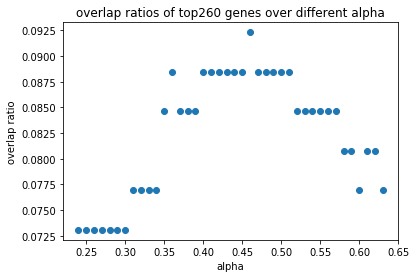

In [127]:
plt.plot(df_alpha['alpha'],df_alpha['overlap_ratio'],'o')
plt.title('overlap ratios of top260 genes over different alpha')
plt.xlabel('alpha')
plt.ylabel('overlap ratio')
plt.savefig('overlap ratios of top260 genes over different alpha.png') 

In [122]:
# use top1000 genes to evaluate
a1=[]
a2=[]
a3=[]
for a in np.arange((alpha-0.2),(alpha+0.2),0.01):
    a1.append(a)
    prop=random_walk_iterative(a, heat_mat, G_adj_array_norm)
    nodes_rwr=dict(list(zip(nodes,prop[0])))
    sorted_keys = sorted(nodes_rwr, key=nodes_rwr.get, reverse=True)
    rwr_genes=sorted_keys[0:1000]
    overlap_genes=intersection(rwr_genes,scz_genes)
    a2.append(overlap_genes)
    overlap_ratio=len(intersection(rwr_genes,scz_genes))/260
    a3.append(overlap_ratio)

iterate times t: 35
iterate times t: 34
iterate times t: 33
iterate times t: 32
iterate times t: 32
iterate times t: 31
iterate times t: 30
iterate times t: 29
iterate times t: 29
iterate times t: 28
iterate times t: 27
iterate times t: 27
iterate times t: 26
iterate times t: 25
iterate times t: 25
iterate times t: 24
iterate times t: 24
iterate times t: 23
iterate times t: 23
iterate times t: 22
iterate times t: 22
iterate times t: 21
iterate times t: 21
iterate times t: 20
iterate times t: 20
iterate times t: 19
iterate times t: 19
iterate times t: 19
iterate times t: 18
iterate times t: 18
iterate times t: 17
iterate times t: 17
iterate times t: 17
iterate times t: 16
iterate times t: 16
iterate times t: 16
iterate times t: 15
iterate times t: 15
iterate times t: 15
iterate times t: 14


In [123]:
df_alpha=pd.DataFrame(np.column_stack([a1,a3]), 
                               columns=['alpha','overlap_ratio'])
df_alpha

,alpha,overlap_ratio
0,0.24,0.223077
1,0.25,0.223077
2,0.26,0.223077
3,0.27,0.230769
4,0.28,0.226923
5,0.29,0.226923
6,0.30,0.230769
7,0.31,0.230769
8,0.32,0.230769
9,0.33,0.234615


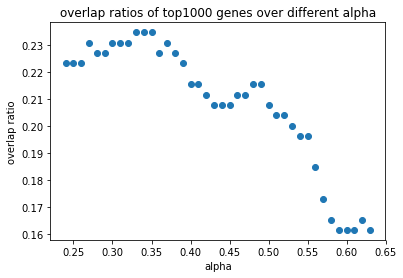

In [124]:
plt.plot(df_alpha['alpha'],df_alpha['overlap_ratio'],'o')
plt.title('overlap ratios of top1000 genes over different alpha')
plt.xlabel('alpha')
plt.ylabel('overlap ratio')
plt.savefig('overlap ratios of top1000 genes over different alpha.png') 

In [115]:
# use top100 genes to evaluate
a1=[]
a2=[]
a3=[]
for a in np.arange((alpha-0.2),(alpha+0.2),0.01):
    a1.append(a)
    prop=random_walk_iterative(a, heat_mat, G_adj_array_norm)
    nodes_rwr=dict(list(zip(nodes,prop[0])))
    sorted_keys = sorted(nodes_rwr, key=nodes_rwr.get, reverse=True)
    rwr_genes=sorted_keys[0:100]
    overlap_genes=intersection(rwr_genes,scz_genes)
    a2.append(overlap_genes)
    overlap_ratio=len(intersection(rwr_genes,scz_genes))/260
    a3.append(overlap_ratio)

iterate times t: 35
iterate times t: 34
iterate times t: 33
iterate times t: 32
iterate times t: 32
iterate times t: 31
iterate times t: 30
iterate times t: 29
iterate times t: 29
iterate times t: 28
iterate times t: 27
iterate times t: 27
iterate times t: 26
iterate times t: 25
iterate times t: 25
iterate times t: 24
iterate times t: 24
iterate times t: 23
iterate times t: 23
iterate times t: 22
iterate times t: 22
iterate times t: 21
iterate times t: 21
iterate times t: 20
iterate times t: 20
iterate times t: 19
iterate times t: 19
iterate times t: 19
iterate times t: 18
iterate times t: 18
iterate times t: 17
iterate times t: 17
iterate times t: 17
iterate times t: 16
iterate times t: 16
iterate times t: 16
iterate times t: 15
iterate times t: 15
iterate times t: 15
iterate times t: 14


In [116]:
df_alpha=pd.DataFrame(np.column_stack([a1,a3]), 
                               columns=['alpha','overlap_ratio'])
df_alpha

,alpha,overlap_ratio
0,0.24,0.042308
1,0.25,0.042308
2,0.26,0.042308
3,0.27,0.042308
4,0.28,0.042308
5,0.29,0.042308
6,0.30,0.042308
7,0.31,0.042308
8,0.32,0.042308
9,0.33,0.042308


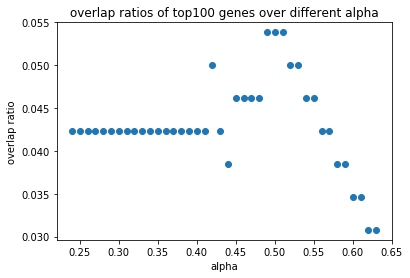

In [121]:
plt.plot(df_alpha['alpha'],df_alpha['overlap_ratio'],'o')
plt.title('overlap ratios of top100 genes over different alpha')
plt.xlabel('alpha')
plt.ylabel('overlap ratio')
plt.savefig('overlap ratios of top100 genes over different alpha.png')

### alpha= 0.49 is the optimal alpha we used to prioritize the genes

In [176]:
a_best=0.49 # consider these three conditions
# a_best=0.35 # for top1000 genes
# a_best=0.44 # the calculated alpha
prop=random_walk_iterative(a_best, heat_mat, G_adj_array_norm)
nodes_rwr=dict(list(zip(nodes,prop[0])))
sorted_keys = sorted(nodes_rwr, key=nodes_rwr.get, reverse=True)
rwr_genes=sorted_keys[0:100]
overlap_genes=intersection(rwr_genes,scz_genes)
overlap_ratio=len(intersection(rwr_genes,scz_genes))/260
overlap_ratio

iterate times t: 19


0.05384615384615385

In [175]:
overlap_genes

['JUN',
 'TP53',
 'MAPK1',
 'NTRK1',
 'PGBD1',
 'INS',
 'ZKSCAN4',
 'CTNNB1',
 'GSK3A',
 'MAPK3',
 'CYP2C9',
 'NKAPL',
 'AKT1',
 'DPYD',
 'CAMK2B',
 'NFKB1',
 'IL6',
 'FGFR1',
 'GRM3',
 'CREB1',
 'GSK3B',
 'TNF',
 'NOS1',
 'NR3C1',
 'DLG1',
 'BCL2',
 'NRXN1',
 'DRD2',
 'CDK5',
 'GRIN2B',
 'FOS',
 'CYP2C19',
 'RELA',
 'HTR2A',
 'LEP',
 'EGR1',
 'PAK2',
 'GAD2',
 'PRL',
 'IL1B',
 'SOD1',
 'CASP3',
 'FNDC4',
 'GFAP',
 'ABCG2',
 'MET',
 'NPY',
 'DAO',
 'CAT',
 'COL3A1',
 'CYP2E1',
 'ASNS',
 'GRIN1',
 'KDR',
 'GABRA1',
 'CCND1']

## generate a data frame of top1000 gene after propagation with the optimized parameters

In [167]:
gene_list=rwr_genes

In [168]:
old_rank=[]
k=0
for j in gene_list:
    if j in list(df_gene['Gene']):
        old_rank.append(list(df_gene['Gene']).index(j))
    else:
        old_rank.append('NA')
        k +=1

In [169]:
k # k can kind of suggest the false positive, becase k is the number of genes
  # whose initial gene scores are zero but in the top 1000 gene list, which might be a false positive effect due to the network structure.
    
    # k=16, for a=0.49
    # k=36, for a=0.35
    # k=23, for a=0.44

23

In [170]:
overlap=[]
for gene in gene_list:
    if gene in overlap_genes:
        overlap.append(1)
    else:
        overlap.append(0)  


In [171]:
df_newrank=pd.DataFrame(np.column_stack([gene_list,old_rank,overlap]), 
                               columns=['gene_list', 'old_rank','overlap'])

In [172]:
df_newrank

,gene_list,old_rank,overlap
0,UBC,11937,0
1,APP,82,0
2,HNF4A,13568,0
3,TAF1,NA,0
4,PRKACB,9242,0
5,PRKACA,10863,0
6,GNB1,12329,0
7,PRKACG,2985,0
8,JUN,6207,1
9,MYC,5699,0


In [173]:
df_newrank.to_csv('top1000genes_group4 3rd a=0.44.csv')